<a href="https://colab.research.google.com/github/nkr9/Deep-learning-experiment/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 1)


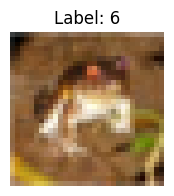

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Check the shapes of the data
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing data shape: {x_test.shape}")
print(f"Testing labels shape: {y_test.shape}")

# Normalize the pixel values (optional but recommended)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Show one sample image
plt.figure(figsize=(2,2))
plt.imshow(x_train[0])
plt.title(f"Label: {y_train[0][0]}")
plt.axis('off')
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 80ms/step - accuracy: 0.2549 - loss: 1.9684 - val_accuracy: 0.5052 - val_loss: 1.3929
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 76ms/step - accuracy: 0.4408 - loss: 1.5323 - val_accuracy: 0.5479 - val_loss: 1.2905
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 76ms/step - accuracy: 0.4930 - loss: 1.4065 - val_accuracy: 0.5954 - val_loss: 1.1661
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 74ms/step - accuracy: 0.5332 - loss: 1.2985 - val_accuracy: 0.6118 - val_loss: 1.1194
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 75ms/step - accuracy: 0.5618 - loss: 1.2214 - val_accuracy: 0.6272 - val_loss: 1.0741
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - accuracy: 0.5786 - loss: 1.1691 - val_accuracy: 0.6549 - val_loss: 0.9933
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.5975 - loss: 1.1285 - val_accuracy: 0.6584 - val_loss: 0.9873
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 78ms/step - accuracy: 0.6099 - loss: 1.0961 - 

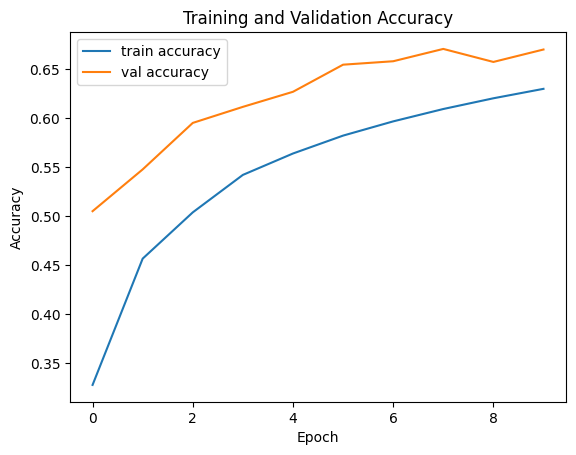

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

# Train the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.3f}')

# Plot training history
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step


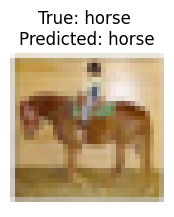

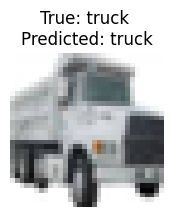

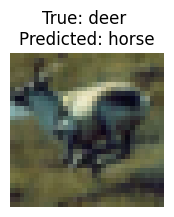

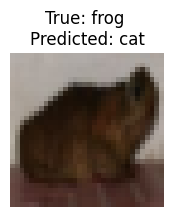

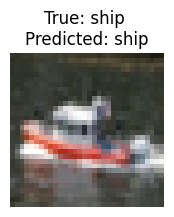

In [ ]:
# Predict labels for test set
y_pred = model.predict(x_test)

# Convert predictions and true labels from one-hot encoding back to integers
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Example: Show 5 random test images with their predicted labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Randomly pick 5 images
indices = np.random.choice(len(x_test), 5, replace=False)

for i in indices:
    plt.figure(figsize=(2,2))
    plt.imshow(x_test[i])
    plt.title(f"True: {class_names[y_true[i]]} \nPredicted: {class_names[y_pred_classes[i]]}")
    plt.axis('off')
    plt.show()


              precision    recall  f1-score   support

    airplane       0.76      0.65      0.70      1000
  automobile       0.86      0.77      0.81      1000
        bird       0.58      0.47      0.52      1000
         cat       0.41      0.56      0.48      1000
        deer       0.58      0.65      0.61      1000
         dog       0.56      0.58      0.57      1000
        frog       0.80      0.72      0.76      1000
       horse       0.74      0.72      0.73      1000
        ship       0.75      0.82      0.78      1000
       truck       0.80      0.76      0.78      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



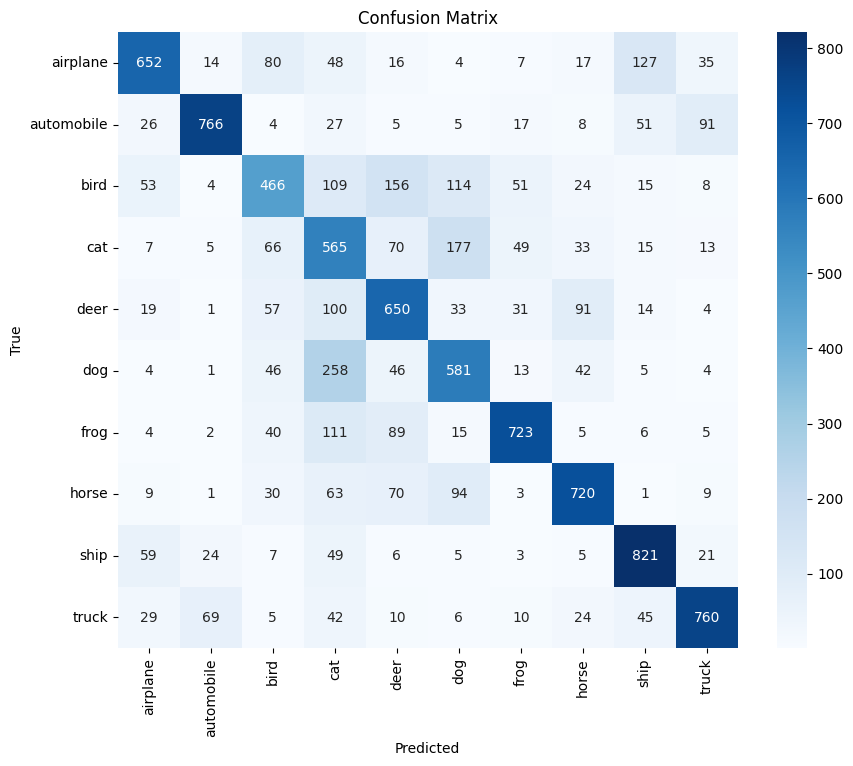

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=class_names))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


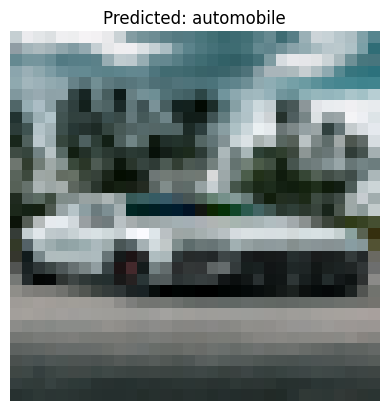

In [ ]:
# Import necessary libraries
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load and preprocess the uploaded image
img_path = r'car.jpg'  # Path of your uploaded image

# Open the image and resize to 32x32 (CIFAR-10 size)
img = Image.open(img_path)
img = img.resize((32, 32))

# Convert image to array
img_array = image.img_to_array(img)

# Normalize (like the training images)
img_array = img_array / 255.0

# Expand dimensions to fit model input
img_array = np.expand_dims(img_array, axis=0)

# Predict using the trained model
prediction = model.predict(img_array)

# Get predicted class
predicted_class = np.argmax(prediction, axis=1)

# Class names in CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Show the image and prediction
plt.imshow(img)
plt.title(f"Predicted: {class_names[predicted_class[0]]}")
plt.axis('off')
plt.show()


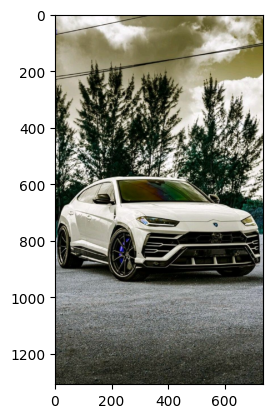

In [ ]:
import cv2
test_image= cv2.imread('car.jpg')
plt.imshow(test_image)